### Dependencies and Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json as json
import matplotlib.colors as mcolors
import config
import datetime as dt

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lon_range = (-180, 180)

#date
date = dt.datetime.now().date()

### Linear regression function

In [2]:
#I would prefer the regression data to be larger and to the right of the figure, but in making a png the borders are
#apparently set by the size of the graph, couldn't make it see beyond that. And to work on all graphs, they must
#be outside the plot area. I found lots of advice on adding empty borders, but not room for text. Probably there's 
#a way, but meanwhile another reason to hate png...

def plt_lin_reg(x_values, regress_values, line_eq, rvalue):
    plt.plot(x_values,regress_values,"k-")
    plt.text(0.72, 0.047, line_eq, fontsize=8, transform=plt.gcf().transFigure)
    r2 = (rvalue**2).round(decimals=2)
    r2_text = (f"r^2 = {r2}")
    plt.text(0.72, 0.007, r2_text, fontsize=8, transform=plt.gcf().transFigure)

### Generate Cities List

In [3]:
# List for holding lat_lons and cities
lat_lons = []
cities = []

# Create a set of random lat and lon combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lons = np.random.uniform(lon_range[0], lon_range[1], size=1500)
#lats = np.random.uniform(lat_range[0], lat_range[1], size=20)
#lons = np.random.uniform(lon_range[0], lon_range[1], size=20)

lat_lons = zip(lats, lons)

# Identify nearest city for each lat, lon combination
for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)


628

### Perform API Calls

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?q="
place = []
lon = []
lat = []
weather = []
weather_desc = []
temp_C = []
feels_like = []
temp_min_C = []
temp_max_C = []
humidity = []
wind_speed = []
clouds = []
country = []
timezone = []
units = "metric"

print(f"Beginning data retrieval")
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
count=-1
for city in cities:
    count += 1
    query_url = url + city + "&appid=" + weather_api_key + "&units=" + units
    current_weather = requests.get(query_url).json()
    #print(json.dumps(current_weather, indent=4, sort_keys=True))
    place.append(city)
    print(f"Adding {count}.\t{city}")
    try:
        lat.append(current_weather['coord']['lat'])
        lon.append(current_weather['coord']['lon'])
        temp_C.append(current_weather['main']['temp'])
        feels_like.append(current_weather['main']['feels_like'])
        temp_min_C.append(current_weather['main']['temp_min'])
        temp_max_C.append(current_weather['main']['temp_max'])
        humidity.append(current_weather['main']['humidity'])
        wind_speed.append(current_weather['wind']['speed'])
        clouds.append(current_weather['clouds']['all'])
        country.append(current_weather['sys']['country'])
        timezone.append(current_weather['timezone'])
    except:
        lat.append("555")
        lon.append("555")
        temp_C.append("555")
        feels_like.append("555")
        temp_min_C.append("555")
        temp_max_C.append("555")
        humidity.append("555")
        wind_speed.append("555")
        clouds.append("555")
        country.append("555")
        timezone.append("555")

#len(lat)
#print(query_url)

Beginning data retrieval
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Adding 0.	barentsburg
Adding 1.	beloha
Adding 2.	albany
Adding 3.	diego de almagro
Adding 4.	mataura
Adding 5.	souillac
Adding 6.	bredasdorp
Adding 7.	nizhneyansk
Adding 8.	illoqqortoormiut
Adding 9.	bay roberts
Adding 10.	belmonte
Adding 11.	upernavik
Adding 12.	nikolskoye
Adding 13.	east london
Adding 14.	puerto escondido
Adding 15.	thompson
Adding 16.	nago
Adding 17.	yellowknife
Adding 18.	port hawkesbury
Adding 19.	rikitea
Adding 20.	punta arenas
Adding 21.	longyearbyen
Adding 22.	suleya
Adding 23.	hilo
Adding 24.	mitchellville
Adding 25.	busselton
Adding 26.	bluff
Adding 27.	kalmunai
Adding 28.	aanekoski
Adding 29.	antalaha
Adding 30.	bambous virieux
Adding 31.	thio
Adding 32.	torbay
Adding 33.	bako
Adding 34.	hobart
Adding 35.	coquimbo
Adding 36.	cape town
Adding 37.	tautira
Adding 38.	tynda
Adding 39.	puerto ayora
Adding 40.	halalo
Adding 41.	tumannyy
Adding 42.	yuzhnyy
Adding 43.	ahipara
Adding 44.	riyadh
Adding 45.	talnak

Adding 389.	narsaq
Adding 390.	norman wells
Adding 391.	kamenskoye
Adding 392.	laguna
Adding 393.	te anau
Adding 394.	sorland
Adding 395.	lorengau
Adding 396.	saint anthony
Adding 397.	laramie
Adding 398.	vero beach
Adding 399.	qasigiannguit
Adding 400.	nome
Adding 401.	mackay
Adding 402.	juegang
Adding 403.	lompoc
Adding 404.	aksarka
Adding 405.	labytnangi
Adding 406.	ville-marie
Adding 407.	karasjok
Adding 408.	okhotsk
Adding 409.	coihaique
Adding 410.	tezu
Adding 411.	lupiro
Adding 412.	lyuban
Adding 413.	bababe
Adding 414.	bathsheba
Adding 415.	yatou
Adding 416.	khasan
Adding 417.	mwingi
Adding 418.	ati
Adding 419.	kirakira
Adding 420.	goiatuba
Adding 421.	nantucket
Adding 422.	cockburn town
Adding 423.	mittersill
Adding 424.	zhigansk
Adding 425.	sept-iles
Adding 426.	ullal
Adding 427.	lagos
Adding 428.	san ramon
Adding 429.	vizinga
Adding 430.	krasnotorka
Adding 431.	san patricio
Adding 432.	madang
Adding 433.	mahebourg
Adding 434.	santa cruz de rosales
Adding 435.	elat
Adding 436

### Make and clean up dataframe of cities

In [5]:
#Convert Raw Data to DataFrame
cities_df = pd.DataFrame({
    "City": place,
    "Lat": lat,
    "Lon": lon,
    "Temp_C": temp_C,
    "Feels_like": feels_like,
    "Temp_min_C": temp_min_C,
    "Temp_max_C": temp_max_C,
    "Humidity": humidity,
    "Wind_speed_mph": wind_speed,
    "Clouds": clouds,
    "Country": country,
    "Time_zone": timezone
})

#Export the city data into a .csv - not yet, waiting for next cleanup steps.
#cities_df.to_csv(output_data_file)

#Display the DataFrame
cities_df


,City,Lat,Lon,Temp_C,Feels_like,Temp_min_C,Temp_max_C,Humidity,Wind_speed_mph,Clouds,Country,Time_zone
0,barentsburg,555,555,555,555,555,555,555,555,555,555,555
1,beloha,-25.17,45.05,15.51,12.19,15.51,15.51,74,5.16,0,MG,10800
2,albany,42.6,-73.97,29.69,30.45,27.22,31.67,42,1.43,65,US,-14400
3,diego de almagro,-26.37,-70.05,17.8,12.12,17.8,17.8,18,4.12,0,CL,-14400
4,mataura,-46.19,168.86,6.75,3.48,6.75,6.75,83,2.8,94,NZ,43200
...,...,...,...,...,...,...,...,...,...,...,...,...
623,sao jose da coroa grande,-8.9,-35.15,23.75,23.61,23.75,23.75,76,4.99,1,BR,-10800
624,mezen,65.85,44.24,14.74,14.86,14.74,14.74,93,1.45,34,RU,10800
625,sedlcany,49.66,14.43,18.43,18.35,17.78,18.89,70,1.38,73,CZ,7200
626,nur,52.67,22.32,15.53,13.05,15.53,15.53,82,4.63,18,PL,7200


In [6]:
#Reset datatypes
cities_df["Lat"] = pd.to_numeric(cities_df["Lat"])
cities_df["Lon"] = pd.to_numeric(cities_df["Lon"])
cities_df["Temp_C"] = pd.to_numeric(cities_df["Temp_C"])
cities_df["Feels_like"] = pd.to_numeric(cities_df["Feels_like"])
cities_df["Temp_min_C"] = pd.to_numeric(cities_df["Temp_min_C"])
cities_df["Temp_max_C"] = pd.to_numeric(cities_df["Temp_max_C"])
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"])
cities_df["Wind_speed_mph"] = pd.to_numeric(cities_df["Wind_speed_mph"])
cities_df["Clouds"] = pd.to_numeric(cities_df["Clouds"])
cities_df["Time_zone"] = pd.to_numeric(cities_df["Time_zone"])
#cities_df.dtypes

#If checking for relative humidity > 100 (not sure why, it can happen, although rare), may as well 
#drop any offenders at the same time. 

#Also dropping rows with "555" (no data, see cell above) values.

cities_df.drop(cities_df[cities_df['Humidity'] > 100].index, inplace = True)
cities_df.drop(cities_df[cities_df['Temp_C'] == 555].index, inplace = True)

#Export the city data into a .csv
cities_df.to_csv(output_data_file)

#Display the DataFrame
cities_df

,City,Lat,Lon,Temp_C,Feels_like,Temp_min_C,Temp_max_C,Humidity,Wind_speed_mph,Clouds,Country,Time_zone
1,beloha,-25.17,45.05,15.51,12.19,15.51,15.51,74,5.16,0,MG,10800
2,albany,42.60,-73.97,29.69,30.45,27.22,31.67,42,1.43,65,US,-14400
3,diego de almagro,-26.37,-70.05,17.80,12.12,17.80,17.80,18,4.12,0,CL,-14400
4,mataura,-46.19,168.86,6.75,3.48,6.75,6.75,83,2.80,94,NZ,43200
5,souillac,-20.52,57.52,20.00,15.27,20.00,20.00,56,7.20,75,MU,14400
...,...,...,...,...,...,...,...,...,...,...,...,...
623,sao jose da coroa grande,-8.90,-35.15,23.75,23.61,23.75,23.75,76,4.99,1,BR,-10800
624,mezen,65.85,44.24,14.74,14.86,14.74,14.74,93,1.45,34,RU,10800
625,sedlcany,49.66,14.43,18.43,18.35,17.78,18.89,70,1.38,73,CZ,7200
626,nur,52.67,22.32,15.53,13.05,15.53,15.53,82,4.63,18,PL,7200


## Worldwide data

### Maximum Temperature vs. Latitude

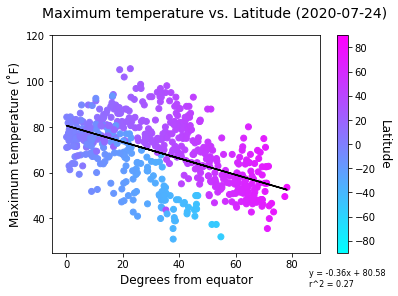

In [7]:
#Easier to compare hemispheres (in my opinion) when plotted as degrees from equator rather than straight latitude.

#Set colorbar parameters
colors = plt.set_cmap('cool')
norm = mcolors.TwoSlopeNorm(vmin=-90, vcenter=0, vmax=90)

#Calculate linear regression
y_values = ((cities_df["Temp_max_C"]*(9/5))+32)
x_values = abs(cities_df["Lat"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c=cities_df.Lat, cmap=colors, norm=norm)
plt.xlim(-5, 90)
plt.ylim(25, 120)

#Add and label colorbar
colorbar = plt.colorbar()
colorbar.set_label('Latitude', rotation=270, size = 12, labelpad=15)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Degrees from equator', size=12)
plt.ylabel('Maximum temperature (˚F)', size=12)
plt.suptitle((f"Maximum temperature vs. Latitude ({date})"), size=14)

#Save to file and print to screen
plt.savefig('../output_data/Fig1_Max_temp_vs_latitude.png')
plt.show()


### Humidity vs. Latitude

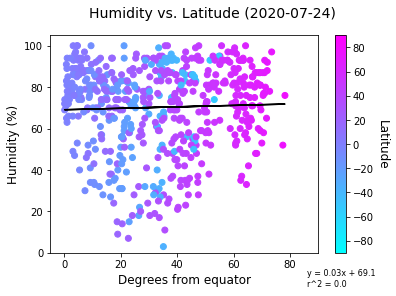

In [8]:
#Set colorbar parameters
colors = plt.set_cmap('cool')
norm = mcolors.TwoSlopeNorm(vmin=-90, vcenter=0, vmax=90)

#Calculate linear regression
y_values = cities_df["Humidity"]
x_values = abs(cities_df["Lat"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c=cities_df.Lat, cmap=colors, norm=norm)
plt.xlim(-5, 90)
plt.ylim(0, 105)

#Add and label colorbar
colorbar = plt.colorbar()
colorbar.set_label('Latitude', rotation=270, size = 12, labelpad=15)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Degrees from equator', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.suptitle((f"Humidity vs. Latitude ({date})"), size=14)

#Save to file and print to screen
plt.savefig('../output_data/Fig2_Humidity_vs_latitude.png')
plt.show()

### Cloudiness vs. Latitude

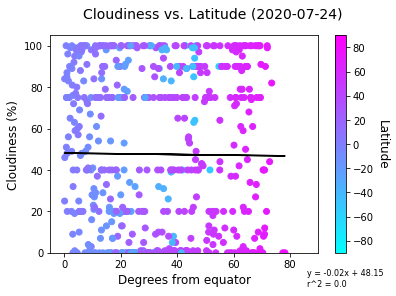

In [9]:
#Set colorbar parameters
colors = plt.set_cmap('cool')
norm = mcolors.TwoSlopeNorm(vmin=-90, vcenter=0, vmax=90)

#Calculate linear regression
y_values = cities_df["Clouds"]
x_values = abs(cities_df["Lat"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c=cities_df.Lat, cmap=colors, norm=norm)
plt.xlim(-5, 90)
plt.ylim(0, 105)

#Add and label colorbar
colorbar = plt.colorbar()
colorbar.set_label('Latitude', rotation=270, size = 12, labelpad=15)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Degrees from equator', size=12)
plt.ylabel('Cloudiness (%)', size=12)
plt.suptitle((f"Cloudiness vs. Latitude ({date})"), size=14)

#Save to file and print to screen
plt.savefig('../output_data/Fig3_Cloudiness_vs_latitude.png')
plt.show()

### Wind Speed vs. Latitude

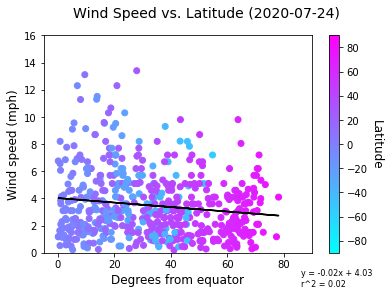

In [10]:
#Set colorbar parameters
colors = plt.set_cmap('cool')
norm = mcolors.TwoSlopeNorm(vmin=-90, vcenter=0, vmax=90)

#Calculate linear regression
y_values = cities_df["Wind_speed_mph"]
x_values = abs(cities_df["Lat"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c=cities_df.Lat, cmap=colors, norm=norm)
plt.xlim(-5, 90)
plt.ylim(0, 16)

#Add and label colorbar
colorbar = plt.colorbar()
colorbar.set_label('Latitude', rotation=270, size = 12, labelpad=15)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Degrees from equator', size=12)
plt.ylabel('Wind speed (mph)', size=12)
plt.suptitle((f"Wind Speed vs. Latitude ({date})"), size=14)

#Save to file and print to screen
plt.savefig('../output_data/Fig4_Wind_speed_vs_latitude.png')
plt.show()

# North vs. South

Create Northern and Southern Hemisphere DataFrames (assigning the equator to the south, just because)

In [11]:
SH_cities_df = cities_df.drop(cities_df[cities_df['Lat'] > 0].index)
#SH_cities_df
NH_cities_df = cities_df.drop(cities_df[cities_df['Lat'] <= 0].index)
#NH_cities_df

## Maximum Temperature vs. Latitude

### Northern Hemisphere

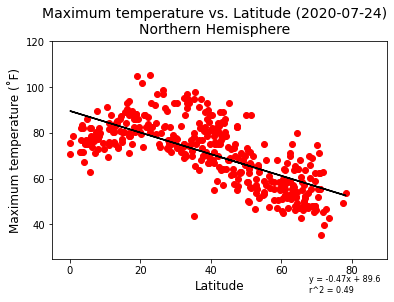

In [12]:
#Convert temperature units, calculate linear regression
y_values = ((NH_cities_df["Temp_max_C"]*(9/5))+32)
x_values = NH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values,c="red")
plt.xlim(-5, 90)
plt.ylim(25, 120)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Latitude', size=12)
plt.ylabel('Maximum temperature (˚F)', size=12)
plt.suptitle((f"Maximum temperature vs. Latitude ({date})\nNorthern Hemisphere\n"), size=14, y=1)

#Save to file and print to screen
plt.savefig('../output_data/Fig5_NH_Max_temp_vs_latitude.png')
plt.show()

### Southern Hemisphere

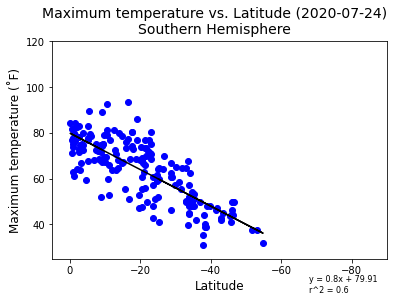

In [13]:
#Convert temperature units, calculate linear regression
y_values = ((SH_cities_df["Temp_max_C"]*(9/5))+32)
x_values = SH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c="b")
plt.xlim(5, -90)
plt.ylim(25, 120)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Latitude', size=12)
plt.ylabel('Maximum temperature (˚F)', size=12)
plt.suptitle((f"Maximum temperature vs. Latitude ({date})\nSouthern Hemisphere\n"), size=14, y=1)

#Save to file and print to screen
plt.savefig('../output_data/Fig6_SH_Max_temp_vs_latitude.png')
plt.show()

### Observations

First a caveat for all these observations: They are based on a single day, obviously that's not the full story. Furthermore, the cities are in different time zones, and of course night and day weather can be different (both in itself and in its impact on vacationers). For temperature, using the maximum should counteract this somewhat, but there's no obvious fix for the other parameters.
    
Records for e.g. the last 5 days would be better, but that is a lot more data, and longer-term data costs money. Another possibility would be to divide calls to the database by timezone, doing a call at e.g. local noon until the complete set was accumulated.

Note also there are more NH cities, and they extend further poleward, reflecting the (current!) distribution of the continents.

For temperature specifically, it is (surprise!) generally warmer near the equator, with decent r^2 values. As we are in SH winter, the temperature there drops off more quickly (the slope is steeper) moving poleward. The most extreme high temperatures are found in the NH, but at least in this sample they are not directly at the equator. I think I will skip the Earth Sciences digression, but this is also not unexpected. A straightline is probably not the best fit.

## Humidity vs. Latitude

### Northern Hemisphere 

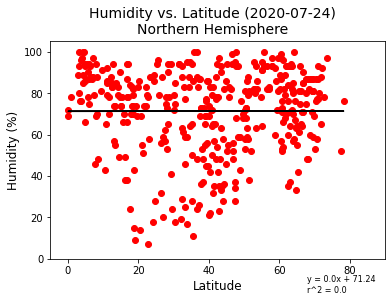

In [14]:
#Calculate linear regression
y_values = NH_cities_df["Humidity"]
x_values = NH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c="r")
plt.xlim(-5, 90)
plt.ylim(0, 105)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Latitude', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.suptitle((f"Humidity vs. Latitude ({date})\nNorthern Hemisphere\n"), size=14, y=1)

#Save to file and print to screen
plt.savefig('../output_data/Fig7_NH_Humidity_vs_latitude.png')
plt.show()

### Southern Hemisphere

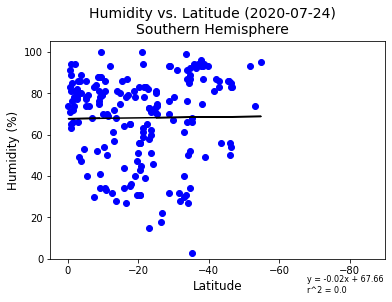

In [15]:
# Calculate linear regression
y_values = SH_cities_df["Humidity"]
x_values = SH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c="b")
plt.xlim(5, -90)
plt.ylim(0, 105)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Latitude', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.suptitle((f"Humidity vs. Latitude ({date})\nSouthern Hemisphere\n"), size=14, y=1)

#Save to file and print to screen
plt.savefig('../output_data/Fig8_SH_Humidity_vs_latitude.png')
plt.show()

### Observations

Humidity covers a wide range in both hemispheres, with no significant latitudinal trend by linear regression. It does seem that the range may be widest at about 20-40N and 20-40S, due to dry areas (hmmm, what would those be?), but something more than linear regression would be needed to analyze that.

## Cloudiness vs. Latitude

### Northern Hemisphere

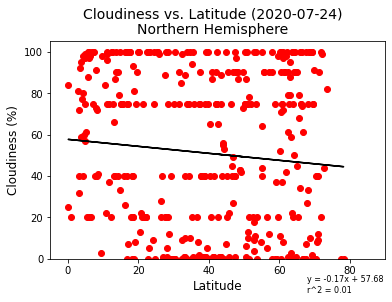

In [16]:
#Calculate linear regression
y_values = NH_cities_df["Clouds"]
x_values = NH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c="r")
plt.xlim(-5, 90)
plt.ylim(0, 105)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Latitude', size=12)
plt.ylabel('Cloudiness (%)', size=12)
plt.suptitle((f"Cloudiness vs. Latitude ({date})\nNorthern Hemisphere\n"), size=14, y=1)

#Save to file and print to screen
plt.savefig('../output_data/Fig9_NH_Cloudiness_vs_latitude.png')
plt.show()

### Southern Hemisphere

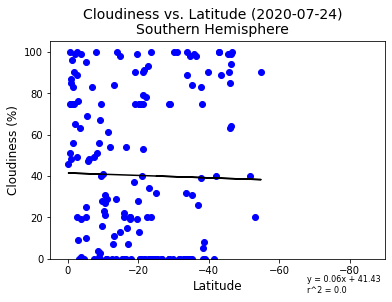

In [17]:
#Calculate linear regression
y_values = SH_cities_df["Clouds"]
x_values = SH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c="blue")
plt.xlim(5, -90)
plt.ylim(0, 105)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Latitude', size=12)
plt.ylabel('Cloudiness (%)', size=12)
plt.suptitle((f"Cloudiness vs. Latitude ({date})\nSouthern Hemisphere\n"), size=14, y=1)

#Save to file and print to screen
plt.savefig('../output_data/Fig10_SH_Cloudiness_vs_latitude.png')
plt.show()

### Observations

At this level of analysis there are no significant trends in cloudiness. However, linear regression is likely not the proper test for all the data. It appears that at many stations it is collected with much broader categories (0/20/40/60/80/100) than at others. The cities should be split into two groups and analyzed separately.

## Wind Speed vs. Latitude

### Northern Hemisphere

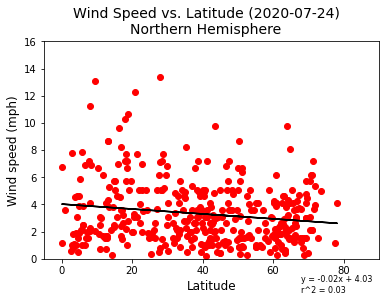

In [18]:
#Calculate linear regression
y_values = NH_cities_df["Wind_speed_mph"]
x_values = NH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c="red")
plt.xlim(-5, 90)
plt.ylim(0, 16)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Latitude', size=12)
plt.ylabel('Wind speed (mph)', size=12)
plt.suptitle((f"Wind Speed vs. Latitude ({date})\nNorthern Hemisphere\n"), size=14, y=1)

#Save to file and print to screen
plt.savefig('../output_data/Fig11_NH_Wind_Speed_vs_latitude.png')
plt.show()

### Southern Hemisphere

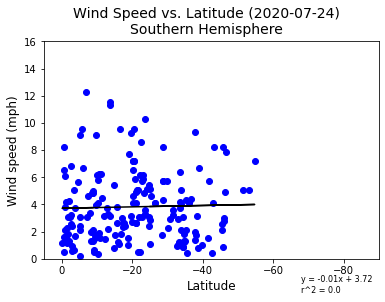

In [19]:
#Calculate linear regression
y_values = SH_cities_df["Wind_speed_mph"]
x_values = SH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot weather data
plt.scatter(x_values,y_values, c="blue")
plt.xlim(5, -90)
plt.ylim(0, 16)

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#Add labels
plt.xlabel('Latitude', size=12)
plt.ylabel('Wind speed (mph)', size=12)
plt.suptitle((f"Wind Speed vs. Latitude ({date})\nSouthern Hemisphere\n"), size=14, y=1)

#Save to file and print to screen
plt.savefig('../output_data/Fig12_SH_Wind_Speed_vs_latitude.png')
plt.show()

### Observations

On this day at this time for this sample of cities there are no significant trends... I predict this will not hold up in the long run.